In [40]:
import pandas as pd
import numpy as np

In [41]:
data = pd.read_csv('C:\\Users\\Siddharth\\Desktop\\Projects\\Credit card fraud detection\\creditcard.csv')
#data.head(5)

Model accuracy: 1.00
Average precision-recall score: 0.74


array([[-3.72816510e-05,  2.00796727e-01, -1.40316503e-01,
        -4.46267516e-01,  2.13361609e-01,  8.71622334e-02,
        -4.18933292e-02,  2.29982475e-01, -2.25807954e-01,
        -2.65172699e-01, -2.60900893e-01, -1.48595897e-01,
        -6.92067592e-02, -2.03657023e-01, -5.24849461e-01,
        -2.98910750e-01, -2.12205086e-01, -2.75114841e-01,
         2.86411773e-02,  5.28917986e-02,  1.25352192e-02,
         2.36760302e-01,  2.64134920e-01,  2.11877352e-03,
         2.31516907e-03, -2.59286073e-01,  6.64446110e-02,
        -3.37736598e-02,  7.30405312e-03, -1.27579010e-03,
         5.65247403e-01]])

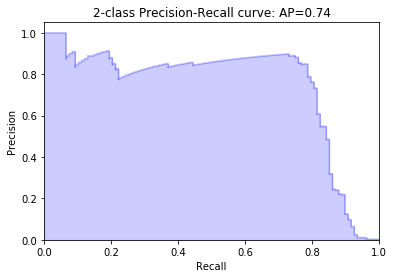

In [48]:
### Train/test split - Logistic Regression model - Optimization through Cross-Validation - Model Evaluation ###

# Train/test split #
from sklearn.model_selection import train_test_split
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size = 0.2)

# Logistic Regreession - Optimization through Cross-Validation #
from sklearn.linear_model import LogisticRegressionCV
LR = LogisticRegressionCV(cv = 15, random_state = 0).fit(X_train,y_train)
y_pred = LR.predict(X_test) #array of predicted classes
y_score = LR.decision_function(X_test)

# Confusion Matrix #
from sklearn.metrics import confusion_matrix
Confusion_Matrix = confusion_matrix(y_test, y_pred)

# Model Accuracy #
from sklearn.metrics import accuracy_score
model_accuracy = accuracy_score(y_test, y_pred)
print('Model accuracy: {0:0.2f}'.format(model_accuracy))

# Precision-Recall score #
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_score)
print('Average precision-recall score: {0:0.2f}'.format(average_precision))

# Precision_Recall curve #
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.utils.fixes import signature
precision, recall, _ = precision_recall_curve(y_test, y_score)
# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

Confusion_Matrix

LR.coef_

Model accuracy: 1.00
Average precision-recall score: 0.93


AttributeError: 'BaggingClassifier' object has no attribute 'feature_importances_'

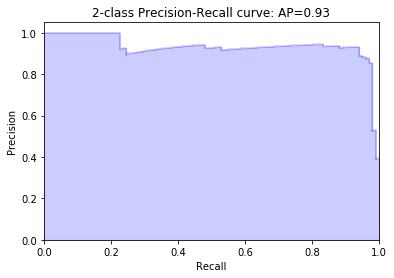

In [50]:
### Ensemble techniques (Random Forest / AdaBoost / Gradient Boosting) - Model Evaluation ###

# Train/test split #
from sklearn.model_selection import train_test_split
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size = 0.2)

# Bagging with Logistic Regression as the base estimator #
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(LogisticRegression(), max_samples=0.5, max_features=0.5, bootstrap=True, bootstrap_features=True).fit(X_train,y_train)
y_pred = bagging.predict(X_test)
y_score = bagging.decision_function(X_test)

# Confusion Matrix #
Confusion_Matrix = confusion_matrix(y_test, y_pred)

# Model Accuracy #
from sklearn.metrics import accuracy_score
model_accuracy = accuracy_score(y_test, y_pred)
print('Model accuracy: {0:0.2f}'.format(model_accuracy))

# Precision-Recall score #
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_score)
print('Average precision-recall score: {0:0.2f}'.format(average_precision))

# Precision_Recall curve #
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.utils.fixes import signature
precision, recall, _ = precision_recall_curve(y_test, y_score)
# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

Confusion_Matrix

In [51]:
# Train/test split #
from sklearn.model_selection import train_test_split
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size = 0.2)

# Random Forest Classifier # 
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators = 10).fit(X_train, y_train)
y_pred = RF.predict(X_test)
#y_score = RF.decision_function(X_test)

# Confusion Matrix #
Confusion_Matrix = confusion_matrix(y_test, y_pred)

# Model Accuracy #
from sklearn.metrics import accuracy_score
model_accuracy = accuracy_score(y_test, y_pred)
print('Model accuracy: {0:0.2f}'.format(model_accuracy))

RF.feature_importances_

Model accuracy: 1.00


array([0.00744124, 0.00673475, 0.00774963, 0.00134501, 0.03751349,
       0.00303587, 0.0245761 , 0.00871899, 0.00077729, 0.04549541,
       0.14212846, 0.0136431 , 0.0317604 , 0.00231076, 0.08576476,
       0.00048684, 0.07658392, 0.10405151, 0.03448349, 0.00361365,
       0.01254307, 0.01398205, 0.00558305, 0.00177043, 0.00214886,
       0.00289201, 0.00816041, 0.0068068 , 0.00351625, 0.00156573,
       0.30281666])

Model accuracy: 1.00
Average precision-recall score: 1.00


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

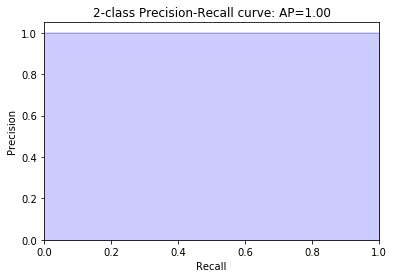

In [52]:
# Train/test split #
from sklearn.model_selection import train_test_split
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size = 0.2)

# AdaBoost #
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
AdB = AdaBoostClassifier(n_estimators = 100).fit(X_train, y_train)
#scores = cross_val_score(AdB, X_train, y_train, cv=5)
y_pred = AdB.predict(X_test)
y_score = AdB.decision_function(X_test)

# Confusion Matrix #
Confusion_Matrix = confusion_matrix(y_test, y_pred)

# Model Accuracy #
from sklearn.metrics import accuracy_score
model_accuracy = accuracy_score(y_test, y_pred)
print('Model accuracy: {0:0.2f}'.format(model_accuracy))

# Precision-Recall score #
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_score)
print('Average precision-recall score: {0:0.2f}'.format(average_precision))

# Precision_Recall curve #
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.utils.fixes import signature
precision, recall, _ = precision_recall_curve(y_test, y_score)
# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

Confusion_Matrix

AdB.feature_importances_

Model accuracy: 1.00
Average precision-recall score: 1.00


array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01])

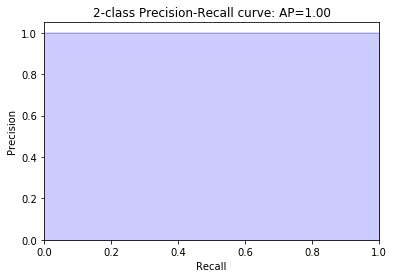

In [53]:
# Train/test split #
from sklearn.model_selection import train_test_split
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size = 0.2)

## Gradient Boosting ##
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(loss = 'deviance', n_estimators = 100, learning_rate = 0.1, 
                                 max_depth = 10, random_state = 1).fit(X_train,y_train)
y_pred = clf.predict(X_test)
y_score = clf.decision_function(X_test)

# Confusion Matrix #
Confusion_Matrix = confusion_matrix(y_test, y_pred)

# Model Accuracy #
from sklearn.metrics import accuracy_score
model_accuracy = accuracy_score(y_test, y_pred)
print('Model accuracy: {0:0.2f}'.format(model_accuracy))

# Precision-Recall score #
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_score)
print('Average precision-recall score: {0:0.2f}'.format(average_precision))

# Precision_Recall curve #
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.utils.fixes import signature
precision, recall, _ = precision_recall_curve(y_test, y_score)
# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

Confusion_Matrix

clf.feature_importances_